Socio Economic Case Study
---------------------------------
Study of socio-economic factors is foundational to understanding and shaping the future of societies and hence of extreme interest to various government and non-government institutions. While GDP is one of the most popular measure used on popular vernacular, it is not the only measure of the growth and the state of an economy. This case study aims to deep dive into one such dataset that contains various socio-economic attributes for countries around the world.


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
%matplotlib widget

#### Load Data

In [4]:
df = pd.read_csv("Country-data.csv")

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### Look at over optics of the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


*167 pieces of data 9 numerical columns of data*

#### Check for null values

In [7]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### Check Duplicates

In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
162    False
163    False
164    False
165    False
166    False
Length: 167, dtype: bool

- No Duplicates

#### Let's check the distribution and outliers for each column in the data

In [10]:
df[df.columns[1]]

0       90.2
1       16.6
2       27.3
3      119.0
4       10.3
       ...  
162     29.2
163     17.1
164     23.3
165     56.3
166     83.1
Name: child_mort, Length: 167, dtype: float64

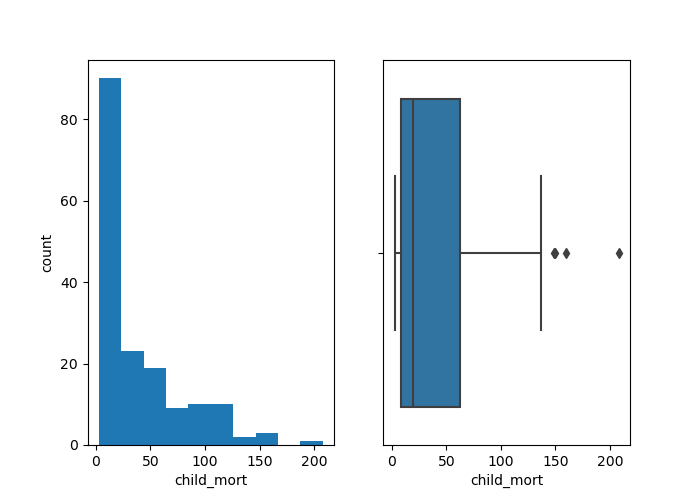

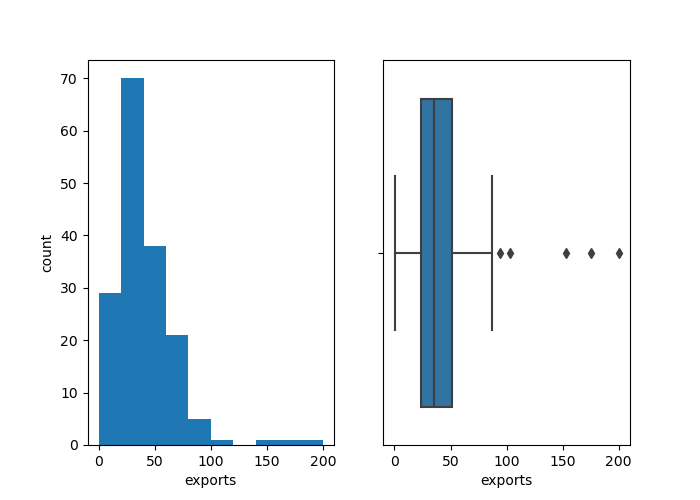

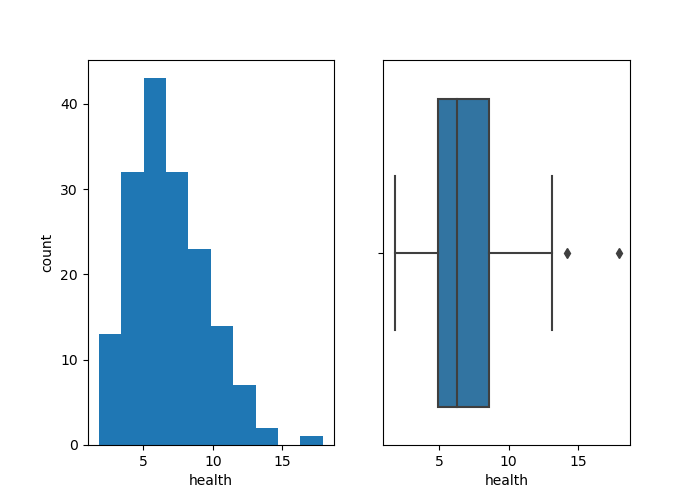

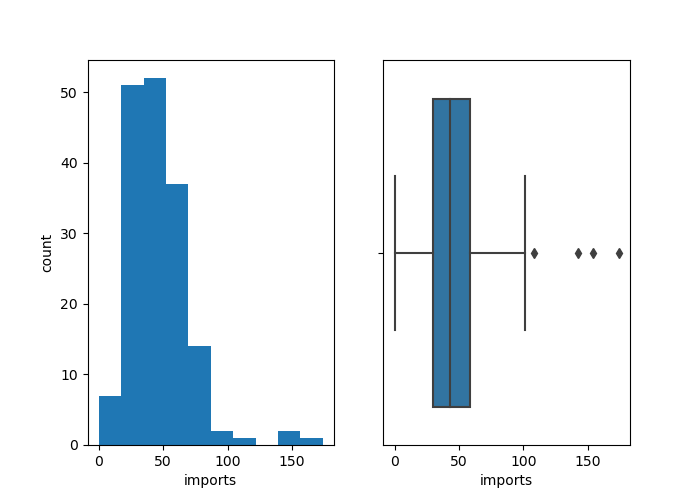

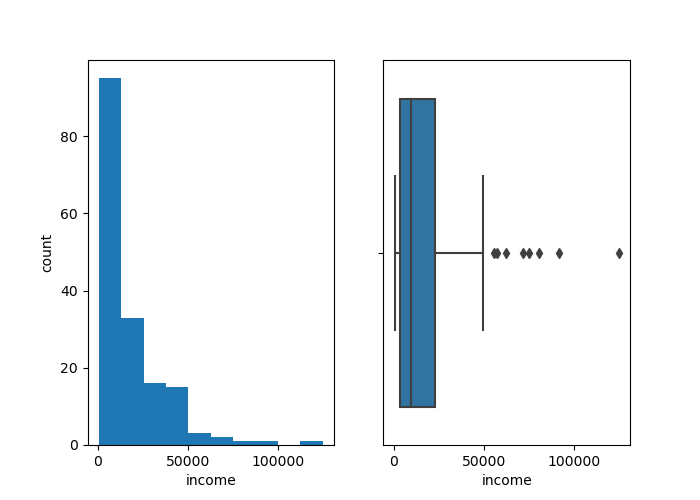

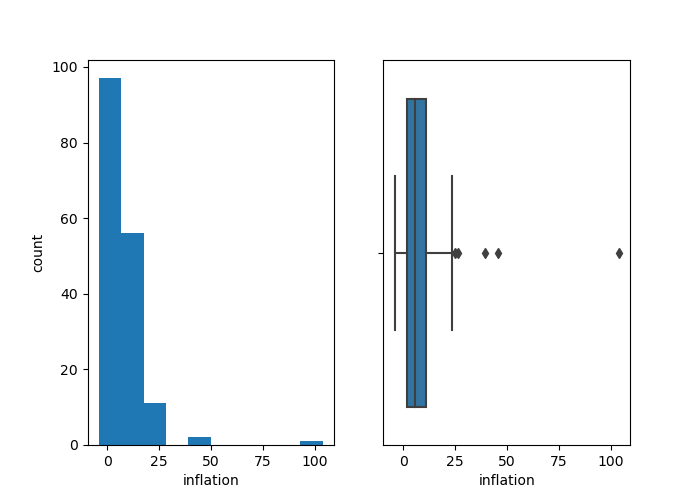

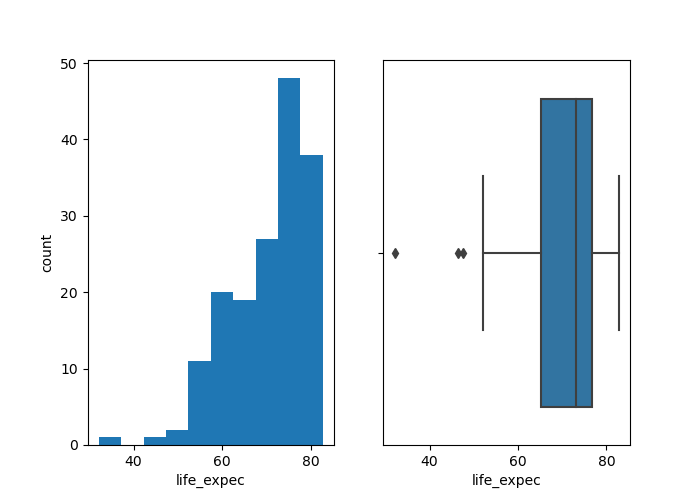

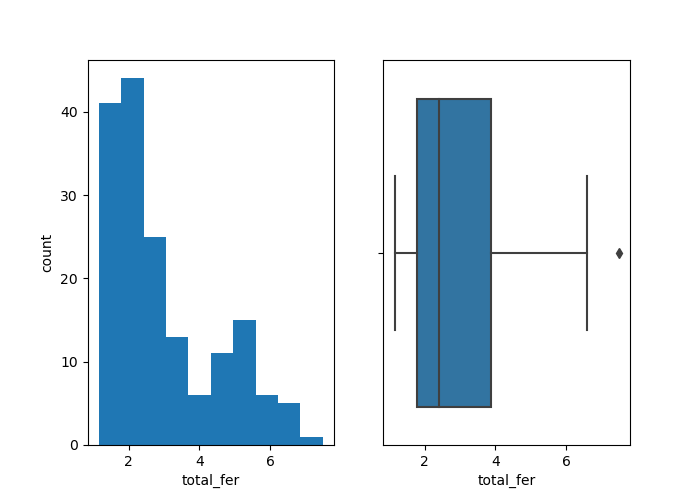

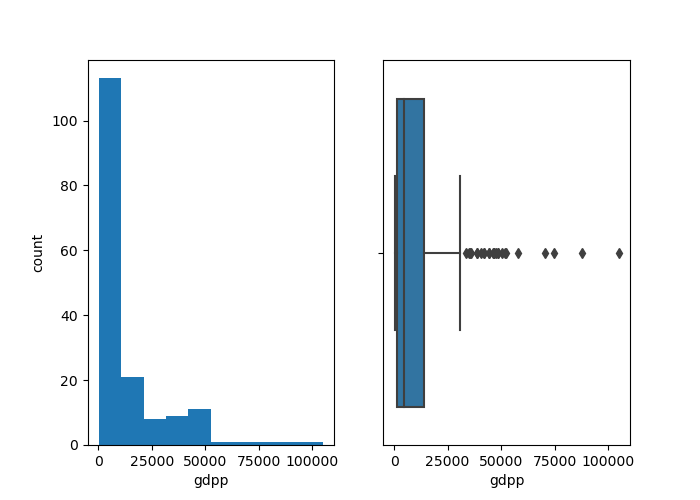

In [11]:
for i in range(1,10):
    fig,ax = plt.subplots(1,2,figsize = (7,5))
    ax[0].hist(df[df.columns[i]])
    ax[0].set_xlabel(df.columns[i])
    ax[0].set_ylabel('count')
    #histogram plot

    sns.boxplot(x=df[df.columns[i]],ax=ax[1])

- Life Expectancy is the only variable with a left skewed distribution

#### Correlation Matrix

<AxesSubplot:>

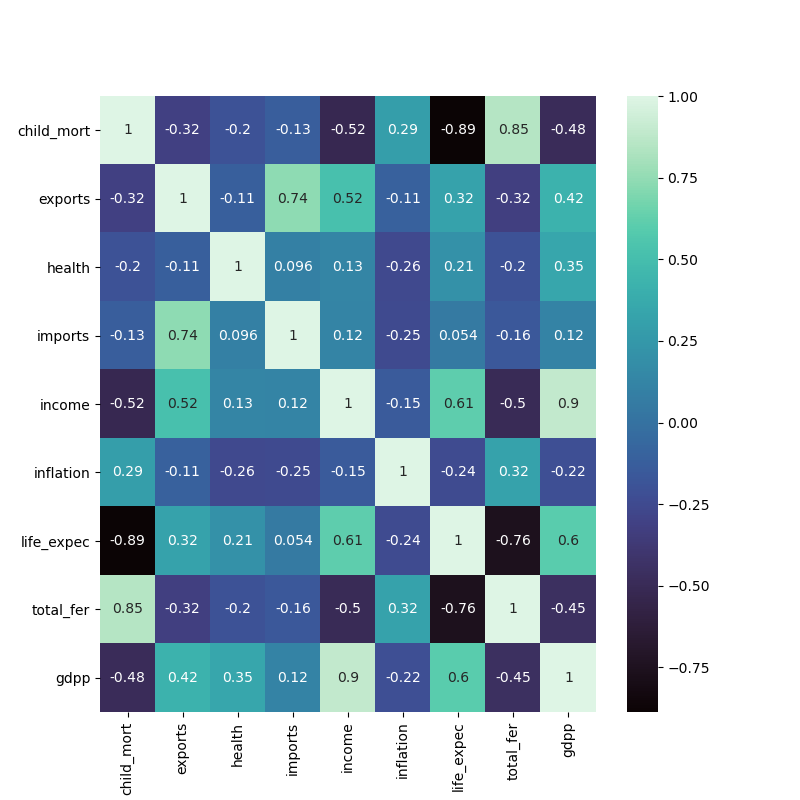

In [12]:
fig,ax1 = plt.subplots(1,1,figsize=(8,8))
dfcorr = df.corr()
sns.heatmap(dfcorr,ax=ax1,annot=True,cmap="mako")

#### Observations
- Strongest correlation exists between net income and GDP
- There is a strong correlation between life expectancy and GDP and income
- We see a negative correalation between life expectancy and child mortality and total fertility
- Strong correlation between import and exports which makes sense
- Exports and income are correlated the more a country produces and ships improve economy

## Clustering Analysis
### Scale Data

In [13]:
#Drop Country and GDP Data
df1 = df.drop(columns=['country','gdpp'])
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13


### Scale Data

In [14]:
#import scikit libraries
#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

#Silhouette score
from sklearn.metrics import silhouette_score

In [15]:
stand = StandardScaler()
dfStand = stand.fit_transform(df1)
dfStand

array([[ 1.29153238, -1.13827979,  0.27908825, ...,  0.15733622,
        -1.61909203,  1.90288227],
       [-0.5389489 , -0.47965843, -0.09701618, ..., -0.31234747,
         0.64786643, -0.85997281],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.78927429,
         0.67042323, -0.0384044 ],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.40973191,
         0.28695762, -0.66120626],
       [ 0.44841668, -0.40647827, -0.59727159, ...,  1.50091625,
        -0.34463279,  1.14094382],
       [ 1.11495062, -0.15034774, -0.33801514, ...,  0.59001454,
        -2.09278484,  1.6246091 ]])

In [16]:
dfStand = pd.DataFrame(dfStand, columns=df1.columns)
dfStand.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946


In [17]:
#Creating copy of the data to store labels from each algorithm
data_scaled_copy = dfStand.copy(deep=True)

### Kmeans

In [23]:
sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(dfStand)
    sse[k] = kmeans.inertia_

sse

c:\Users\jarre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


{1: 1336.0000000000002,
 2: 920.7664031311607,
 3: 774.143411908239,
 4: 657.7770477963129,
 5: 589.8790583293346,
 6: 510.03708740091446,
 7: 451.3880196655709,
 8: 404.57465326065517,
 9: 377.91947717699725}

In [27]:
sse.values()

dict_values([1336.0000000000002, 920.7664031311607, 774.143411908239, 657.7770477963129, 589.8790583293346, 510.03708740091446, 451.3880196655709, 404.57465326065517, 377.91947717699725])

Text(0.5, 0, '# of clusters')

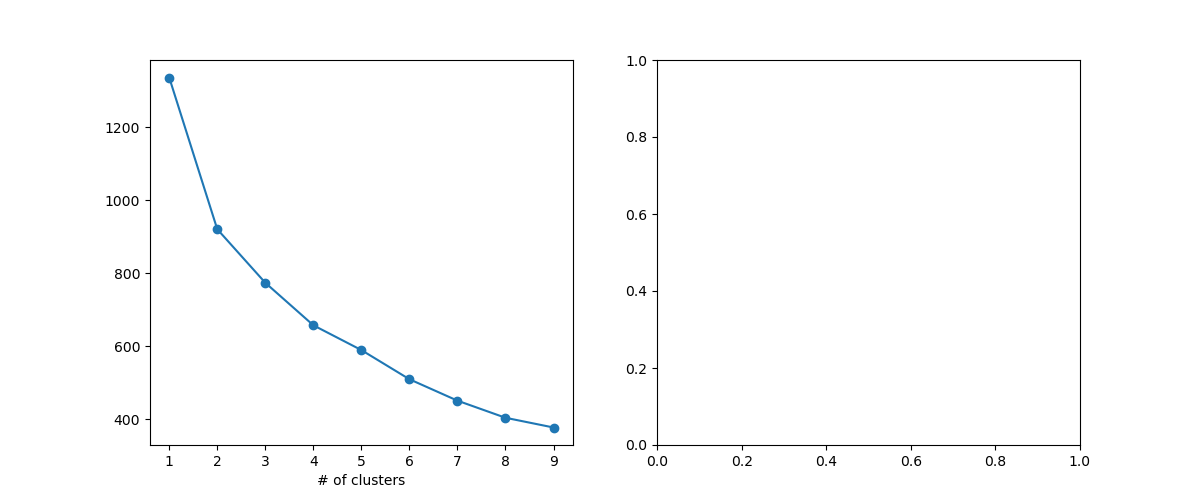

In [37]:
#plot k means inertia
fig3, ax3 = plt.subplots(1,2,figsize=(12,5))
ax3[0].plot(sse.keys(),sse.values(),marker='o')
ax3[0].set_xlabel('# of clusters')

- There is a consistent dip from 2 to 9 clusters, lets look at another method

#### Silhouette Score

In [33]:
sil = {}

for k in range(2,10):
    kmeans2 = KMeans(n_clusters=k,random_state=1)
    kmeans2.fit(dfStand)
    clusters = kmeans2.predict(dfStand)
    sil[k] = silhouette_score(dfStand,clusters)
    print(f"This is silhoutte score for {k} clusters: {sil[k]}")
sil

This is silhoutte score for 2 clusters: 0.33176966698961224
This is silhoutte score for 3 clusters: 0.3504413458953165
This is silhoutte score for 4 clusters: 0.2527443296808876
This is silhoutte score for 5 clusters: 0.2247218442698007
This is silhoutte score for 6 clusters: 0.2297350286802757
This is silhoutte score for 7 clusters: 0.23703064301577992
This is silhoutte score for 8 clusters: 0.24154318101740646
This is silhoutte score for 9 clusters: 0.21697257842558001


{2: 0.33176966698961224,
 3: 0.3504413458953165,
 4: 0.2527443296808876,
 5: 0.2247218442698007,
 6: 0.2297350286802757,
 7: 0.23703064301577992,
 8: 0.24154318101740646,
 9: 0.21697257842558001}

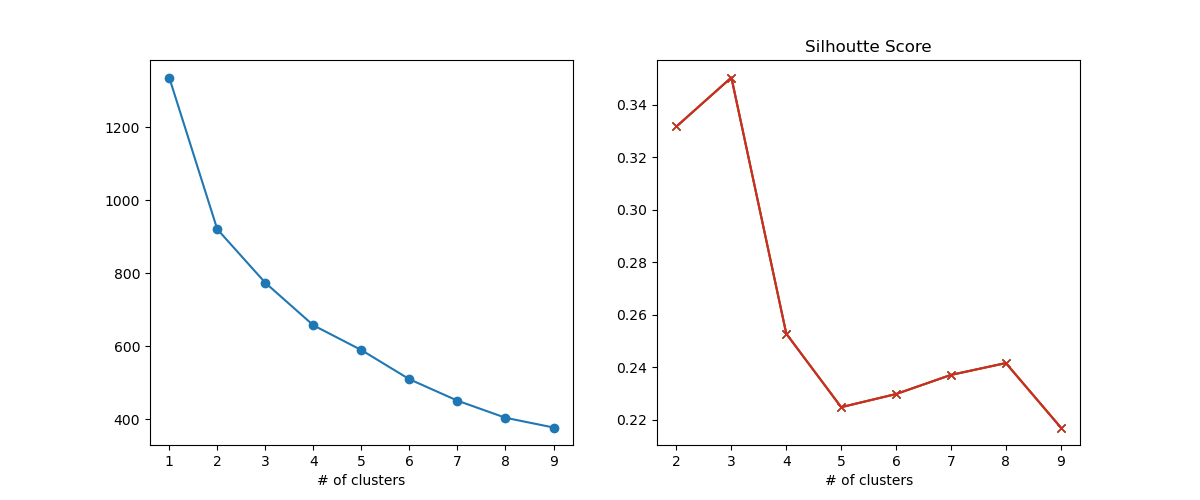

In [41]:
#plot silhoutte
ax3[1].plot(sil.keys(),sil.values(),'-x')
ax3[1].set_xlabel('# of clusters')
ax3[1].set_title('Silhoutte Score')
plt.show()

- We can see from our plot use n clusters = 3 as the optimal cluster

In [43]:
kmeans_final = KMeans(n_clusters=3, random_state=1)
kmeans_final.fit(dfStand)
data_scaled_copy['Kmeans']= kmeans_final.predict(dfStand)
df['Kmeans'] = kmeans_final.predict(dfStand)

In [44]:
data_scaled_copy.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,Kmeans
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,1
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,0
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,0
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,1
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,0


In [45]:
data_scaled_copy['Kmeans'].value_counts()

0    112
1     52
2      3
Name: Kmeans, dtype: int64

In [46]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'Kmeans'],
      dtype='object')

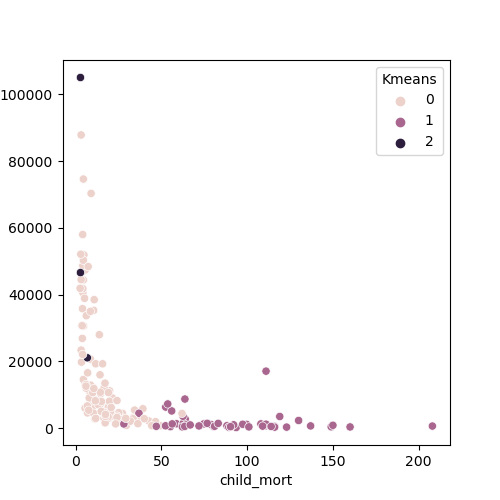

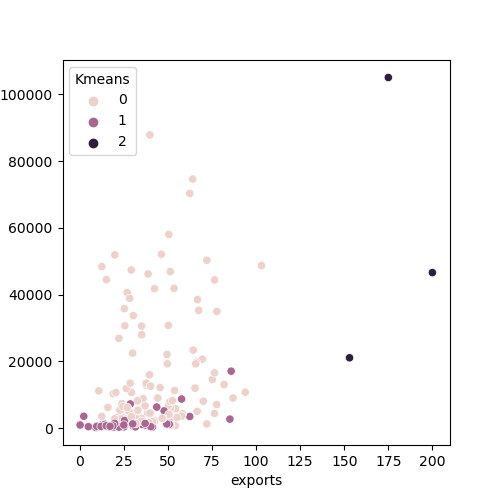

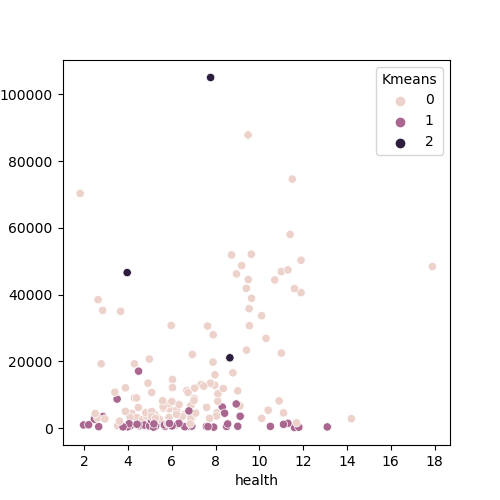

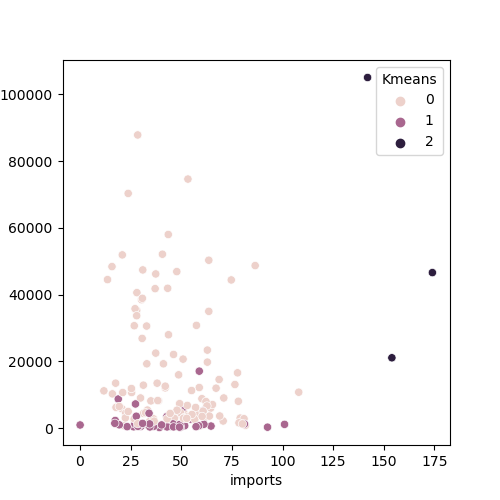

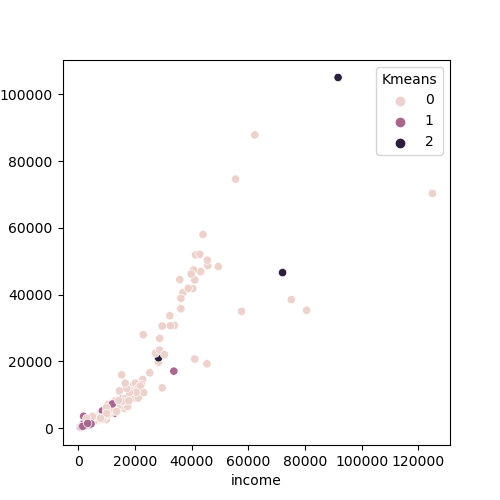

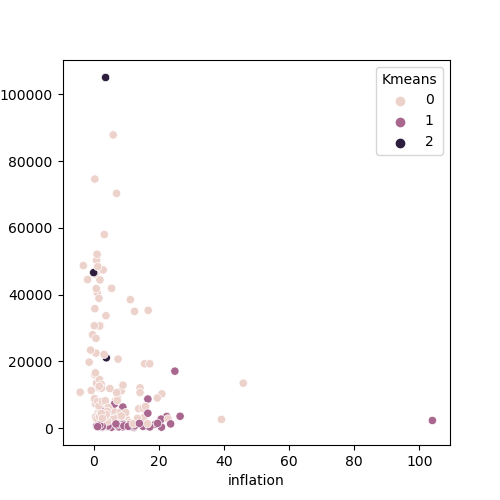

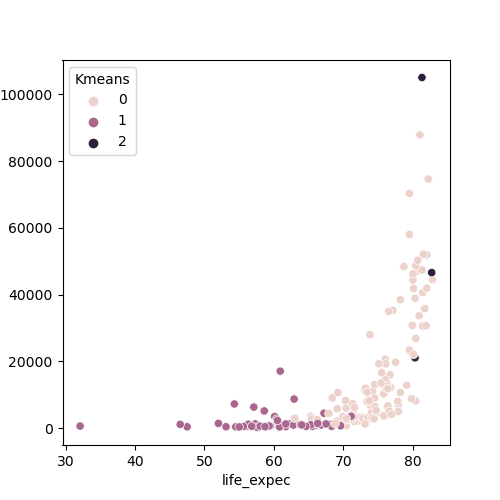

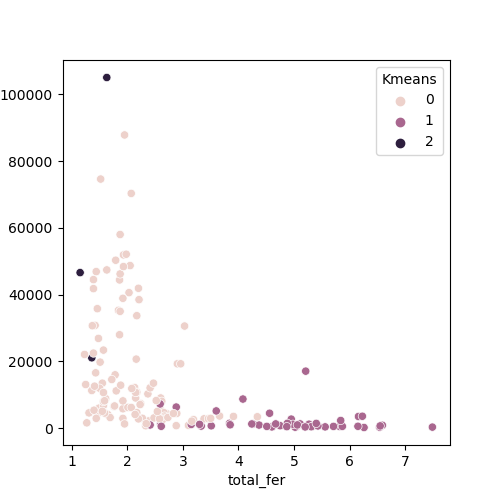

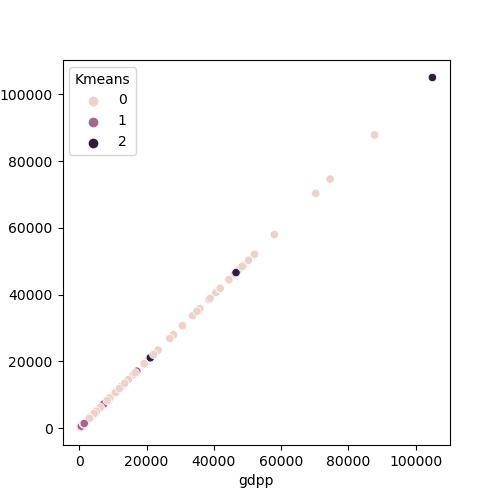

In [53]:
labels = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

for label in labels:
    fig4,ax4 = plt.subplots(1,1,figsize = (5,5))
    sns.scatterplot(x=df[label], y=df['gdpp'],hue=df['Kmeans'])
    plt.show()

#### Gaussian Mixture 

In [54]:
gmm = GaussianMixture(n_components=3, random_state=1)
gmm.fit(dfStand)
df['GMM'] = gmm.predict(dfStand)
df['GMM'] = gmm.predict(dfStand)

In [55]:
df['GMM'].value_counts()

0    67
2    62
1    38
Name: GMM, dtype: int64

In [56]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'Kmeans', 'GMM'],
      dtype='object')

In [65]:
probs = gmm.predict_proba(dfStand)
size = 50*probs.max(1)**2

c:\Users\jarre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


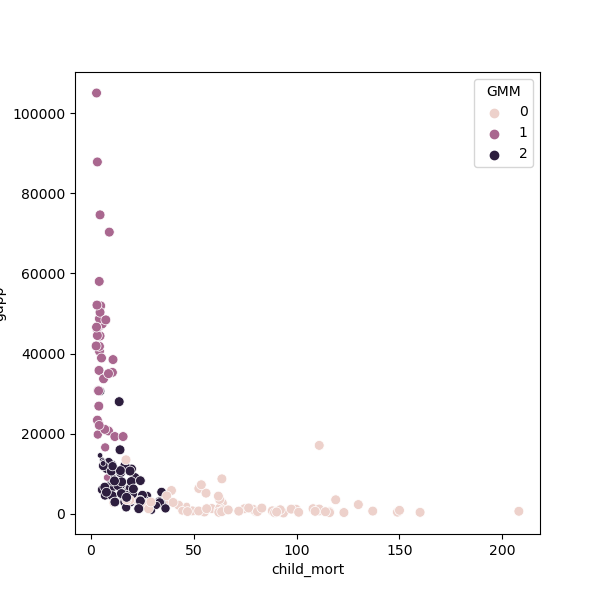

c:\Users\jarre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


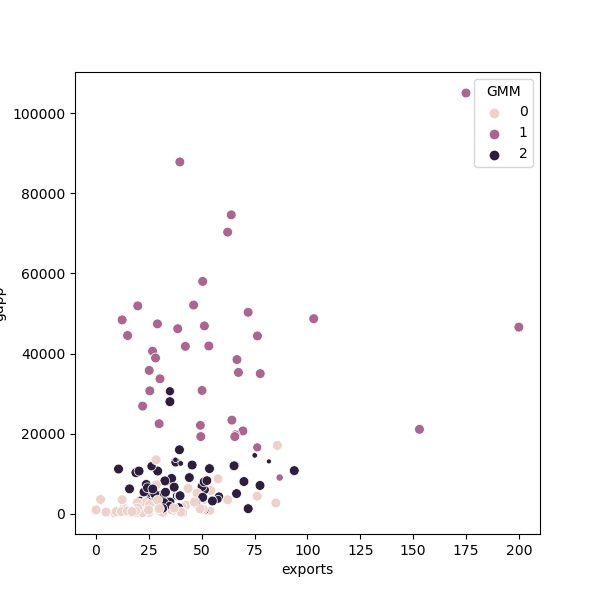

c:\Users\jarre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


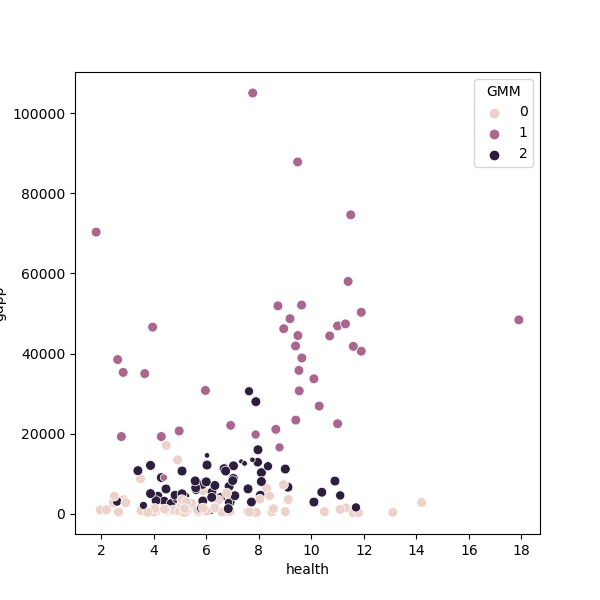

c:\Users\jarre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


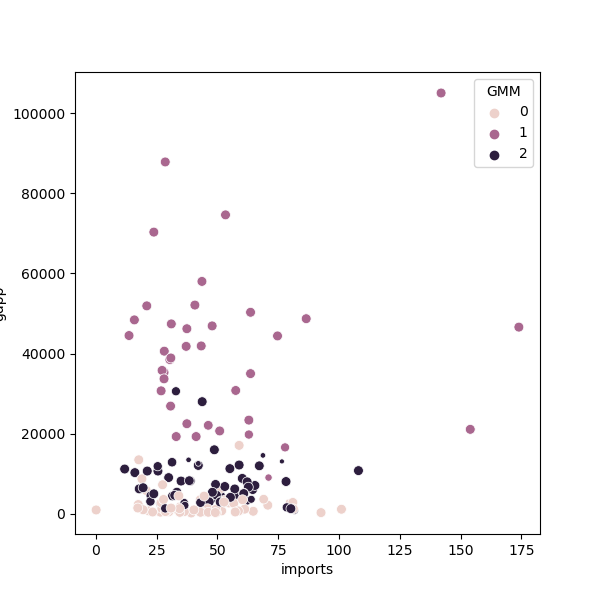

c:\Users\jarre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


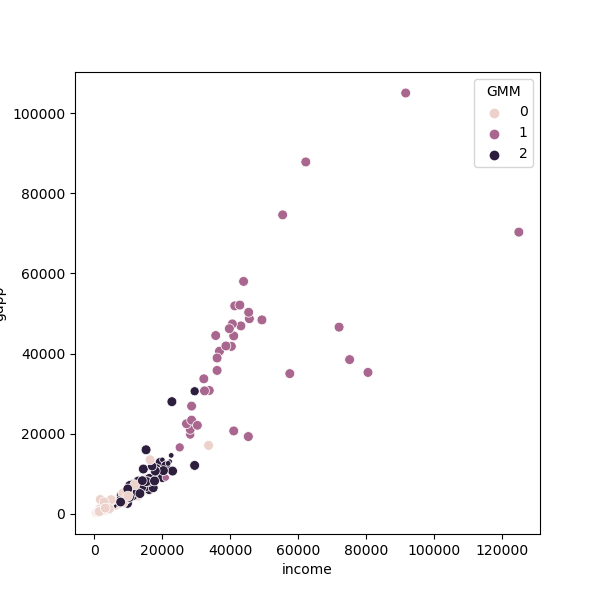

c:\Users\jarre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


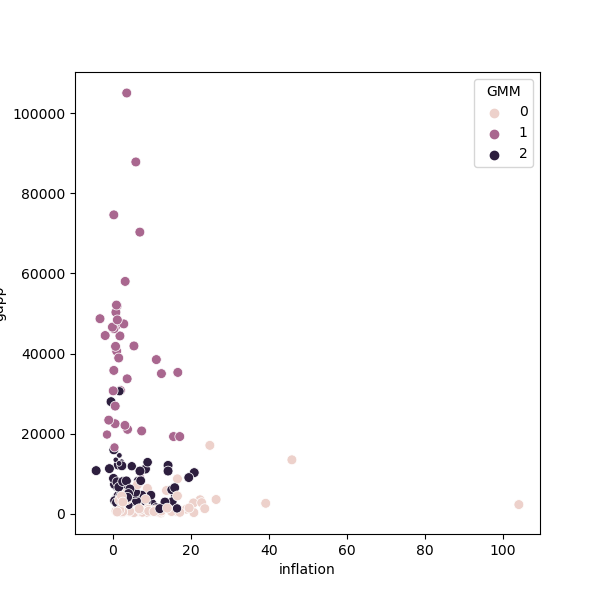

c:\Users\jarre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


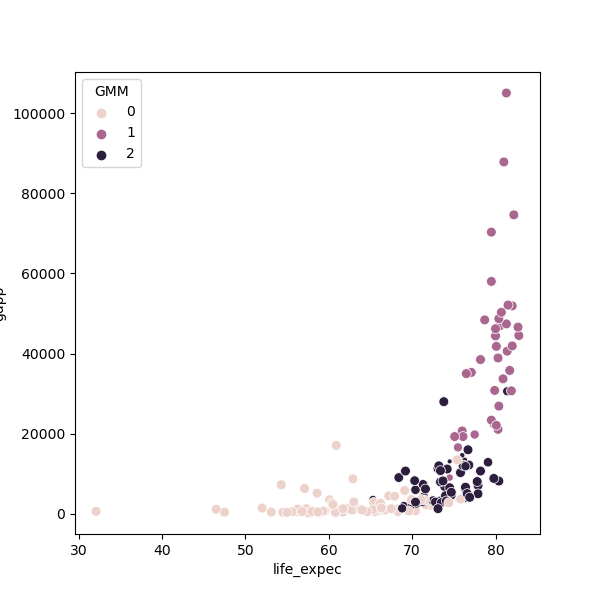

c:\Users\jarre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


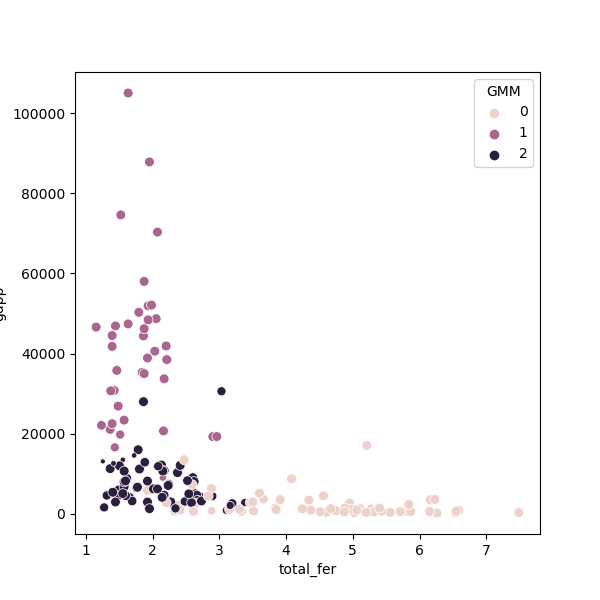

c:\Users\jarre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


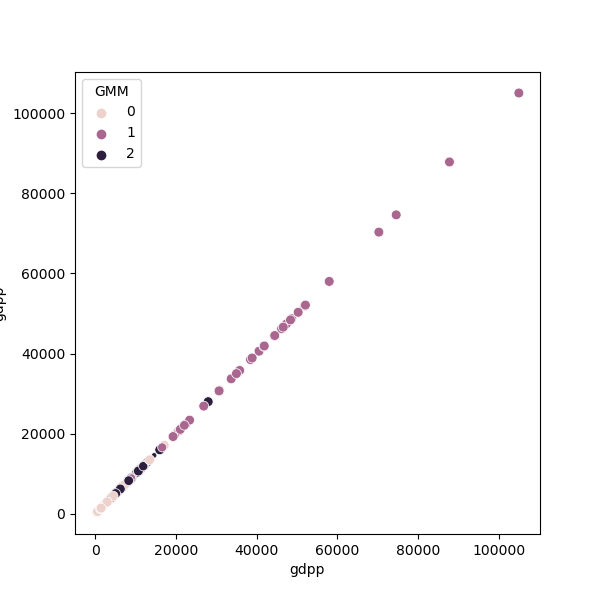

In [66]:
for label in labels:
    fig5,ax5 = plt.subplots(1,1,figsize =(6,6))
    sns.scatterplot(df[label], df['gdpp'],hue=df['GMM'],s=size)
    
    plt.show()
    fig.tight_layout

#### Observations
- Cluster 0 seems to group the poorer or underdeveloped countries, Cluster 1 is the most "developed" or wealthiest countries
- Countries with higher GDP have lower fertility rates
- Cluster group 0 has the lowest life expectancy while Cluster group 1 has the highest

In [67]:
probs

array([[1.00000000e+000, 0.00000000e+000, 7.16403953e-033],
       [1.07429249e-003, 9.60893107e-016, 9.98925708e-001],
       [3.98841865e-002, 4.48542498e-037, 9.60115814e-001],
       [1.00000000e+000, 0.00000000e+000, 1.37638228e-055],
       [3.43251172e-005, 2.65821421e-006, 9.99963017e-001],
       [9.34190072e-004, 5.89241834e-005, 9.99006886e-001],
       [2.77664387e-002, 1.99552859e-016, 9.72233561e-001],
       [8.43114170e-023, 9.99999928e-001, 7.23236039e-008],
       [1.13550930e-021, 1.00000000e+000, 1.98992510e-011],
       [9.99974862e-001, 4.24721206e-109, 2.51377253e-005],
       [1.50065063e-005, 4.79212072e-009, 9.99984989e-001],
       [5.06807530e-016, 9.99997466e-001, 2.53448691e-006],
       [9.99140929e-001, 1.23645286e-205, 8.59070825e-004],
       [6.33842553e-005, 1.86258738e-011, 9.99936616e-001],
       [4.22345360e-002, 8.53495947e-017, 9.57765464e-001],
       [3.52456978e-018, 1.00000000e+000, 2.06828579e-010],
       [7.52988745e-002, 9.33044640e-020